In [945]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

In [946]:
train=pd.read_csv("train (2).csv")
test=pd.read_csv("test (2).csv")

In [947]:
test["Survived"]=-888

In [948]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [949]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-888
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-888
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-888
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-888
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-888


In [950]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [951]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [952]:
data=pd.concat([train,test],axis=0)

In [953]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [954]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [955]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

# age, cabin, embarked, fare have null values

In [956]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Survived,1309.0,-283.301757,414.337413,-888.00,-888.0000,0.0000,1.000,1.0000


In [957]:
print('skewness for age : ', data.Age.skew())
print('skewness for fare : ',data.Fare.skew())

skewness for age :  0.40767455974362266
skewness for fare :  4.367709134122922


In [958]:
data.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

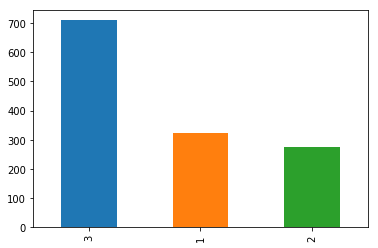

In [959]:
data.Pclass.value_counts().plot(kind='bar')

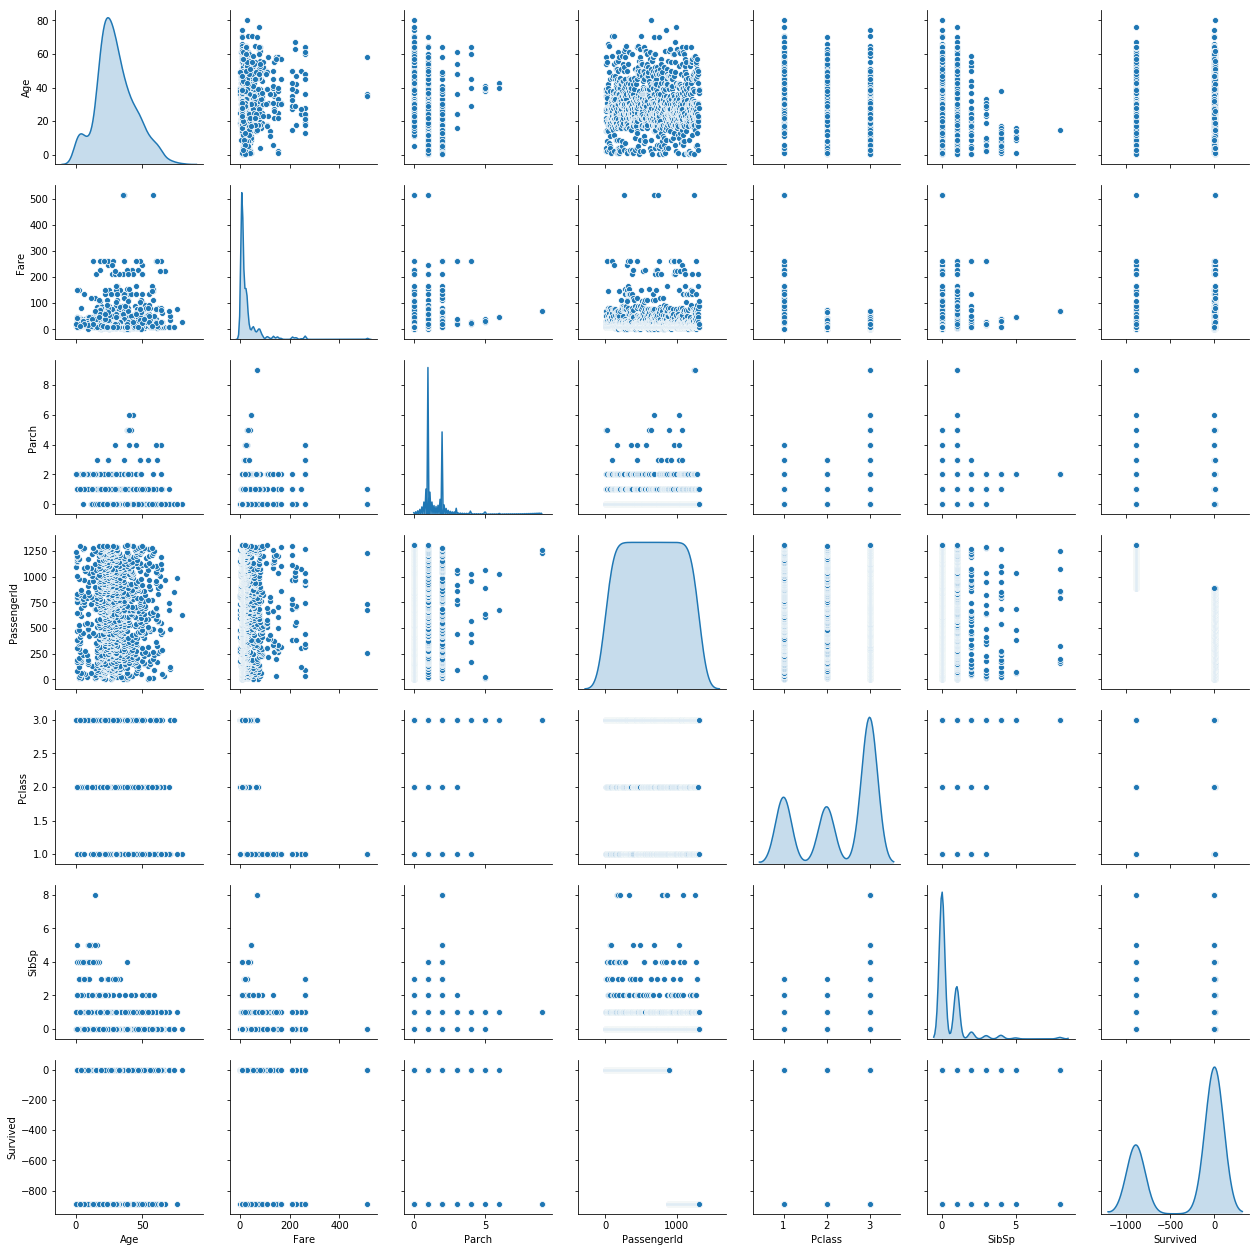

In [960]:
sns.pairplot(data,diag_kind='kde')
plt.show()

In [961]:
p=data[data["Survived"]==0].count()
n=data[data["Survived"]==1].count()
t=(p/(n+p))*100
t["Survived"]          # % of not survived

61.61616161616161

In [962]:
p=data[data["Survived"]==0].count()
n=data[data["Survived"]==1].count()
t=(n/(n+p))*100
t["Survived"]          # % of survived

38.38383838383838

In [963]:
pd.crosstab(data.Sex, data.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


In [964]:
data.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [965]:
data[data.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,-888,3701


In [966]:
mfare = data.loc[(data.Pclass == 3) & (data.Embarked == 'S'),'Fare'].median()
print(mfare)

8.05


In [967]:
data.Fare.fillna(mfare, inplace=True)

In [968]:
data[data.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket


In [969]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [970]:
data[data.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1,113572


In [971]:
data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [972]:
# which embarked point has higher survival count
pd.crosstab(data[data.Survived != -888].Survived, data[data.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [973]:
# Option 2 : explore the fare of each class for each embarkment point
data.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [974]:
# replace the missing values with 'C'
data.Embarked.fillna('C', inplace=True)

In [975]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [976]:
# Function to extract the title from the name 
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]


In [977]:
# create Title feature
data['Title'] =  data.Name.map(lambda x : GetTitle(x))

In [978]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr


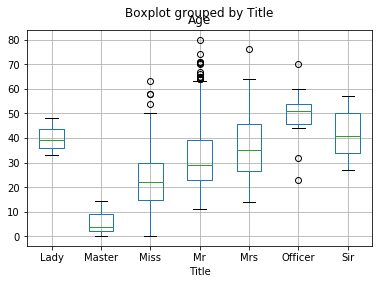

In [979]:
# Box plot of Age with title
data[data.Age.notnull()].boxplot('Age','Title');

In [980]:
title_age_median = data.groupby('Title').Age.transform('median')
# replace missing values
data.Age.fillna(title_age_median , inplace=True)

In [981]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr


In [982]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 183.2+ KB


In [983]:
data.drop(columns="Cabin",axis=1,inplace=True)   # drop Cabin because it has a lot of null values

In [984]:
data.shape

(1309, 12)

In [985]:
data.isnull().sum()

Age            0
Embarked       0
Fare           0
Name           0
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
Ticket         0
Title          0
dtype: int64

# Feature Encoding 

In [986]:
# Family : Adding Parents with Siblings
data['FamilySize'] = data.Parch + data.SibSp + 1 # 1 for self

In [987]:
pd.crosstab(data[data.Survived != -888].Survived, data[data.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


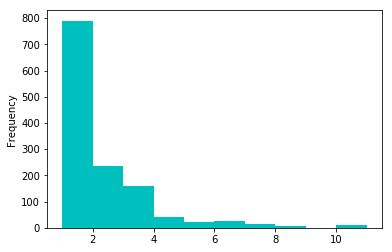

In [988]:
# explore the family feature
data['FamilySize'].plot(kind='hist', color='c');

In [989]:
# a lady aged more thana 18 who has Parch >0 and is married i.e not Miss
data['IsMother'] = np.where(((data.Sex == 'female') & (data.Parch > 0) & (data.Age > 18) & (data.Title != 'Miss')), 1, 0)


In [990]:
# Crosstab with IsMother
pd.crosstab(data[data.Survived != -888].Survived, data[data.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


In [991]:
data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,IsMother
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr,2,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs,2,0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss,1,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs,2,0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr,1,0


In [992]:
# AgeState based on Age
data['AgeState'] = np.where(data['Age'] >= 18, 'Adult','Child')

In [993]:
#AgeState Counts
data['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [994]:
# crosstab
pd.crosstab(data[data.Survived != -888].Survived, data[data.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


In [995]:
# Create a fare bin

data['Fare_Bin'] = pd.qcut(data.Fare, 4, labels=['very_low','low','high','very_high'])

In [996]:
# reorder columns
columns = [column for column in data.columns if column != 'Survived']
columns = ['Survived'] + columns
data = data[columns]

In [997]:
data.head()

,Survived,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Title,FamilySize,IsMother,AgeState,Fare_Bin
0,0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,Mr,2,0,Adult,very_low
1,1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,Mrs,2,0,Adult,very_high
2,1,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,Miss,1,0,Adult,low
3,1,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,Mrs,2,0,Adult,very_high
4,0,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450,Mr,1,0,Adult,low


# Creating Dummies

In [998]:
# sex
data['IsMale'] = np.where(data.Sex == 'male', 1, 0)


# columns 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'
data = pd.get_dummies(data,columns=['Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'],drop_first=True)


print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 26 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
PassengerId           1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_Mrs             1309 non-null uint8
Title_Officer         1309 non-null uint8
Title_Sir             1309 non-null uint8
Fare_Bin_low          1309 non-null uint8
Fare_

In [999]:
# drop columns
data.drop(['PassengerId','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)

# Get Dummies

In [1000]:
newtrain=data.iloc[0:891,:] 
newtest=data.iloc[891::,:]

In [1001]:
newtest.head()

,Survived,Age,Fare,FamilySize,IsMother,IsMale,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_Q,Embarked_S,AgeState_Child
0,-888,34.5,7.8292,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,-888,47.0,7.0000,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,-888,62.0,9.6875,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0
3,-888,27.0,8.6625,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,-888,22.0,12.2875,3,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [1002]:
newtrain.tail()

,Survived,Age,Fare,FamilySize,IsMother,IsMale,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_Q,Embarked_S,AgeState_Child
886,0,27.0,13.00,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0
887,1,19.0,30.00,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
888,0,22.0,23.45,4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
889,1,26.0,30.00,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
890,0,32.0,7.75,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [1003]:
data.nunique()

Survived                3
Age                    98
Fare                  281
FamilySize              9
IsMother                2
IsMale                  2
Pclass_2                2
Pclass_3                2
Title_Master            2
Title_Miss              2
Title_Mr                2
Title_Mrs               2
Title_Officer           2
Title_Sir               2
Fare_Bin_low            2
Fare_Bin_high           2
Fare_Bin_very_high      2
Embarked_Q              2
Embarked_S              2
AgeState_Child          2
dtype: int64

In [1004]:
%matplotlib inline
from sklearn.model_selection  import train_test_split
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [1005]:
y=newtrain["Survived"]
x=newtrain.drop(columns="Survived")
x_std=StandardScaler().fit_transform(x) 
xdf=pd.DataFrame(x_std)
xdf.columns=x.columns

# scaling of Input, don't scale output(because it is categorical)


x_train,x_test,y_train,y_test= train_test_split(xdf,y,test_size=0.3,random_state=0)


In [1006]:
xdf.head()

,Age,Fare,FamilySize,IsMother,IsMale,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Sir,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_Q,Embarked_S,AgeState_Child
0,-0.551877,-0.502445,0.059160,-0.256495,0.737695,-0.510152,0.902587,-0.216803,-0.510152,0.850532,-0.407714,-0.116841,-0.101015,-0.579510,-0.588151,-0.563957,-0.307562,0.619306,-0.388797
1,0.656997,0.786845,0.059160,-0.256495,-1.355574,-0.510152,-1.107926,-0.216803,-0.510152,-1.175735,2.452702,-0.116841,-0.101015,-0.579510,-0.588151,1.773185,-0.307562,-1.614710,-0.388797
2,-0.249658,-0.488854,-0.560975,-0.256495,-1.355574,-0.510152,0.902587,-0.216803,1.960202,-1.175735,-0.407714,-0.116841,-0.101015,1.725595,-0.588151,-0.563957,-0.307562,0.619306,-0.388797
3,0.430333,0.420730,0.059160,-0.256495,-1.355574,-0.510152,-1.107926,-0.216803,-0.510152,-1.175735,2.452702,-0.116841,-0.101015,-0.579510,-0.588151,1.773185,-0.307562,0.619306,-0.388797
4,0.430333,-0.486337,-0.560975,-0.256495,0.737695,-0.510152,0.902587,-0.216803,-0.510152,0.850532,-0.407714,-0.116841,-0.101015,1.725595,-0.588151,-0.563957,-0.307562,0.619306,-0.388797


In [1007]:
lr=LogisticRegression(random_state=0)
naivesmodel=GaussianNB()
knn=KNeighborsClassifier(weights = 'uniform',metric='euclidean')
dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)
rf_model=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0)

lr.fit(x_train,y_train)
naivesmodel.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt_model.fit(x_train,y_train)
rf_model.fit(x_train,y_train)

y_pred1=naivesmodel.predict(x_test)
y_pred2=lr.predict(x_test)
y_pred3=knn.predict(x_test)
y_pred4=dt_model.predict(x_test)
y_pred5=rf_model.predict(x_test)

# Finding the best Parameter

In [1008]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':np.arange(1,30)}
knn=KNeighborsClassifier()
KN=GridSearchCV(knn,params,cv=5)
KN.fit(x,y)
KN.best_params_

{'n_neighbors': 19}

In [1009]:

parameter={'max_depth':np.arange(1,20)}
DT=GridSearchCV(dt_model,parameter,cv=5)
DT.fit(x,y)
DT.best_params_

{'max_depth': 4}

In [1010]:

parameter={'max_depth':np.arange(1,20)}
RF=GridSearchCV(rf_model,parameter,cv=5)
RF.fit(x,y)
RF.best_params_

{'max_depth': 10}

In [1011]:
knn=KNeighborsClassifier(n_neighbors= 19 , weights = 'uniform',metric='euclidean')
dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=4)
rf_model=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0,max_depth=10)

knn.fit(x_train,y_train)
dt_model.fit(x_train,y_train)
rf_model.fit(x_train,y_train)

y_pred3=knn.predict(x_test)
y_pred4=dt_model.predict(x_test)
y_pred5=rf_model.predict(x_test)

In [1012]:
print(metrics.classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       168
           1       0.71      0.75      0.73       100

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [1013]:

print(metrics.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       168
           1       0.76      0.78      0.77       100

   micro avg       0.82      0.82      0.82       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.82      0.83       268



In [1014]:
print(metrics.classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       168
           1       0.76      0.72      0.74       100

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



In [1015]:
print(metrics.classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       168
           1       0.74      0.75      0.75       100

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [1016]:
print(metrics.classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       168
           1       0.84      0.70      0.77       100

   micro avg       0.84      0.84      0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268



In [1017]:
print("Accuracy Score for Logistic Regression",metrics.accuracy_score(y_test,y_pred1))
print("Accuracy Score for Gaussian",metrics.accuracy_score(y_test,y_pred2))
print("Accuracy Score for KNN",metrics.accuracy_score(y_test,y_pred3))
print("Accuracy Score for Decision Tree",metrics.accuracy_score(y_test,y_pred4))
print("Accuracy Score for Random Forest",metrics.accuracy_score(y_test,y_pred5))

Accuracy Score for Logistic Regression 0.7910447761194029
Accuracy Score for Gaussian 0.8246268656716418
Accuracy Score for KNN 0.8097014925373134
Accuracy Score for Decision Tree 0.8097014925373134
Accuracy Score for Random Forest 0.8395522388059702


In [1018]:
cm1=metrics.confusion_matrix(y_test,y_pred1)  #Logistic Regression Confusion matrix
cm2=metrics.confusion_matrix(y_test,y_pred2)  #Gaussian  Confusion matrix
cm3=metrics.confusion_matrix(y_test,y_pred3)  #KNN Confusion matrix
cm4=metrics.confusion_matrix(y_test,y_pred4)  #Decision Tree Confusion matrix
cm5=metrics.confusion_matrix(y_test,y_pred5)  #Random Forest Confusion matrix
print('Logistic Regression Confusion matrix\n', cm1)
print('\nGaussian  Confusion matrix\n', cm2)
print('\nKNN Confusion matrix\n',cm3)
print('\nDecision Tree Confusion matrix\n',cm4)
print('\nRandom Forest Confusion matrix\n',cm5)


Logistic Regression Confusion matrix
 [[137  31]
 [ 25  75]]

Gaussian  Confusion matrix
 [[143  25]
 [ 22  78]]

KNN Confusion matrix
 [[145  23]
 [ 28  72]]

Decision Tree Confusion matrix
 [[142  26]
 [ 25  75]]

Random Forest Confusion matrix
 [[155  13]
 [ 30  70]]


In [1019]:
models=[]

models.append(('Logistic Regression',lr))

models.append(('Naives Bayes',naivesmodel))
models.append(('KNN ',knn))
models.append(('Decision Tree',dt_model))

models.append(('Random Forest',rf_model))

Logistic Regression:  	 0.823790 ,(variance error is 0.025789)
Naives Bayes:  	 0.715988 ,(variance error is 0.157697)
KNN :  	 0.814858 ,(variance error is 0.038996)
Decision Tree:  	 0.831636 ,(variance error is 0.025454)
Random Forest:  	 0.828335 ,(variance error is 0.035315)


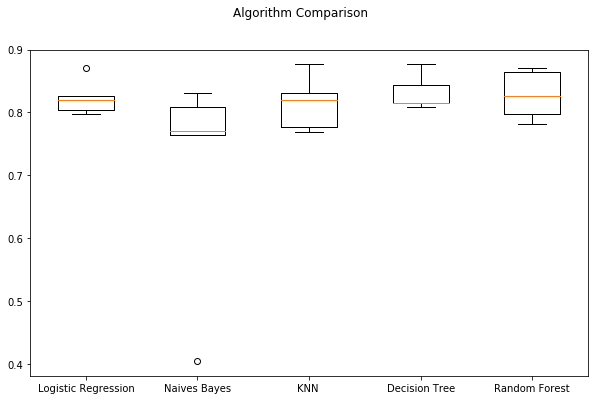

In [1020]:
results=[]
names=[]
scoring='accuracy'
for name, model in models:
    kfold=model_selection.KFold(n_splits=5,random_state=2)
    cv_results=model_selection.cross_val_score(model,xdf,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:  \t %f ,(variance error is %f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

fig=plt.figure(figsize=(10,6))
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [1021]:
newtest.drop(columns="Survived",inplace=True)
newtest=StandardScaler().fit_transform(newtest)

In [1022]:
y_train=newtrain["Survived"]
x_train=xdf
x_test=newtest
rf_model=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=0,max_depth=10)
rf_model.fit(x_train,y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [1023]:
Result=pd.DataFrame({'PassengerId':test.PassengerId.values})

In [1024]:
# We Choose Random forest model because it has a good precision and recall
Result['Survived']=rf_model.predict(x_test)   


In [1025]:
Result.to_csv("gender_submissions.csv",index=False)